In [1]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time
import pandas as pd
import xarray as xr

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [2]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
runid	= 'Arc12'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False)        # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative
input_directory  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'

first_year = 2014
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

months =np.linspace(0,11,12).astype(int)

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [14]:
ind_all = np.load('index_all.npy')
ind_eu = np.load('index_eurasian.npy')
ind_am = np.load('index_amerasian.npy')
ind_sl = np.load('index_slope.npy')

# V1 -> d(u.N)
# mesoscale local horizontal effect

tracername = 'HADV'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hadv_all    = f1.variables['ADVH'][:,ind_all].mean(axis=1) * 30
hadv_eu    = f1.variables['ADVH'][:,ind_eu].mean(axis=1) * 30
hadv_am    = f1.variables['ADVH'][:,ind_am].mean(axis=1) * 30
hadv_sl    = f1.variables['ADVH'][:,ind_sl].mean(axis=1) * 30

# mesoscale local vertical effect

tracername = 'VADV'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vadv_all    = f1.variables['VADV'][:,ind_all].mean(axis=1) * 30
vadv_eu    = f1.variables['VADV'][:,ind_eu].mean(axis=1) * 30
vadv_am    = f1.variables['VADV'][:,ind_am].mean(axis=1) * 30
vadv_sl    = f1.variables['VADV'][:,ind_sl].mean(axis=1) * 30

# V2 -> u.d(N) -> MEAN
# remote horizontal effect

tracername = 'HADVv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hadv2_all    = f1.variables['ADVH'][:,ind_all].mean(axis=1) * 30
hadv2_eu    = f1.variables['ADVH'][:,ind_eu].mean(axis=1) * 30
hadv2_am    = f1.variables['ADVH'][:,ind_am].mean(axis=1) * 30
hadv2_sl    = f1.variables['ADVH'][:,ind_sl].mean(axis=1) * 30

# remote vertical effect

tracername = 'VADVv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vadv2_all    = f1.variables['VADV'][:,ind_all].mean(axis=1) * 30
vadv2_eu    = f1.variables['VADV'][:,ind_eu].mean(axis=1) * 30
vadv2_am    = f1.variables['VADV'][:,ind_am].mean(axis=1) * 30
vadv2_sl    = f1.variables['VADV'][:,ind_sl].mean(axis=1) * 30

# V1 -> d(u'.N') -> EDDY
# submesoscale local effect

tracername = 'HEDY'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hedy_all    = f1.variables['HEDY'][:,ind_all].mean(axis=1) * 30
hedy_eu    = f1.variables['HEDY'][:,ind_eu].mean(axis=1) * 30
hedy_am    = f1.variables['HEDY'][:,ind_am].mean(axis=1) * 30
hedy_sl    = f1.variables['HEDY'][:,ind_sl].mean(axis=1) * 30

tracername = 'VEDY'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vedy_all    = f1.variables['VEDY'][:,ind_all].mean(axis=1) * 30
vedy_eu    = f1.variables['VEDY'][:,ind_eu].mean(axis=1) * 30
vedy_am    = f1.variables['VEDY'][:,ind_am].mean(axis=1) * 30
vedy_sl    = f1.variables['VEDY'][:,ind_sl].mean(axis=1) * 30

# V2 -> u' .d(N') -> EDDY
# submesoscale local effect

tracername = 'HEDYv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
hedyv2_all    = f1.variables['HEDY'][:,ind_all].mean(axis=1) * 30
hedyv2_eu    = f1.variables['HEDY'][:,ind_eu].mean(axis=1) * 30
hedyv2_am    = f1.variables['HEDY'][:,ind_am].mean(axis=1) * 30
hedyv2_sl    = f1.variables['HEDY'][:,ind_sl].mean(axis=1) * 30

tracername = 'VEDYv2'
ncfile       = input_directory+tracername+'.2014.monthly.nc'
f1           = Dataset(ncfile, 'r')
vedyv2_all    = f1.variables['VEDY'][:,ind_all].mean(axis=1) * 30
vedyv2_eu    = f1.variables['VEDY'][:,ind_eu].mean(axis=1) * 30
vedyv2_am    = f1.variables['VEDY'][:,ind_am].mean(axis=1) * 30
vedyv2_sl    = f1.variables['VEDY'][:,ind_sl].mean(axis=1) * 30

In [10]:
# runid	= 'Arc14'
# input_directory  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'
# mesh_id    = 'meshArc20'
# meshpath   = '/scratch/usr/hbkvsk12/hlrn3_work2/mesh/'+mesh_id+'/'  
# mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False)
# tracername = 'VMIX'
# ncfile       = input_directory+tracername+'.2014.monthly.nc'
# f1           = Dataset(ncfile, 'r')

# vmix = np.load('VMIX2014_Arc12_monthly.npy')
# ind_all = np.load('index_all.npy')
# ind_eu = np.load('index_eurasian.npy')
# ind_am = np.load('index_amerasian.npy')
# ind_sl = np.load('index_slope.npy')

# vmix_all    = vmix[:,ind_all].mean(axis=1) * 30
# vmix_eu    = vmix[:,ind_eu].mean(axis=1) * 30
# vmix_am    = vmix[:,ind_am].mean(axis=1) * 30
# vmix_sl    = vmix[:,ind_sl].mean(axis=1) * 30

In [11]:
vmix = np.load('VMIX2014_Arc12_monthly.npy')
ind_all = np.load('index_all.npy')
ind_eu = np.load('index_eurasian.npy')
ind_am = np.load('index_amerasian.npy')
ind_sl = np.load('index_slope.npy')

vmix_all = np.mean(vmix[:,ind_all],axis=1)
vmix_eu = np.mean(vmix[:,ind_eu],axis=1)
vmix_am = np.mean(vmix[:,ind_am],axis=1)
vmix_sl = np.mean(vmix[:,ind_sl],axis=1)

In [12]:
colors = plt.get_cmap("tab10")
np.shape(colors)

()

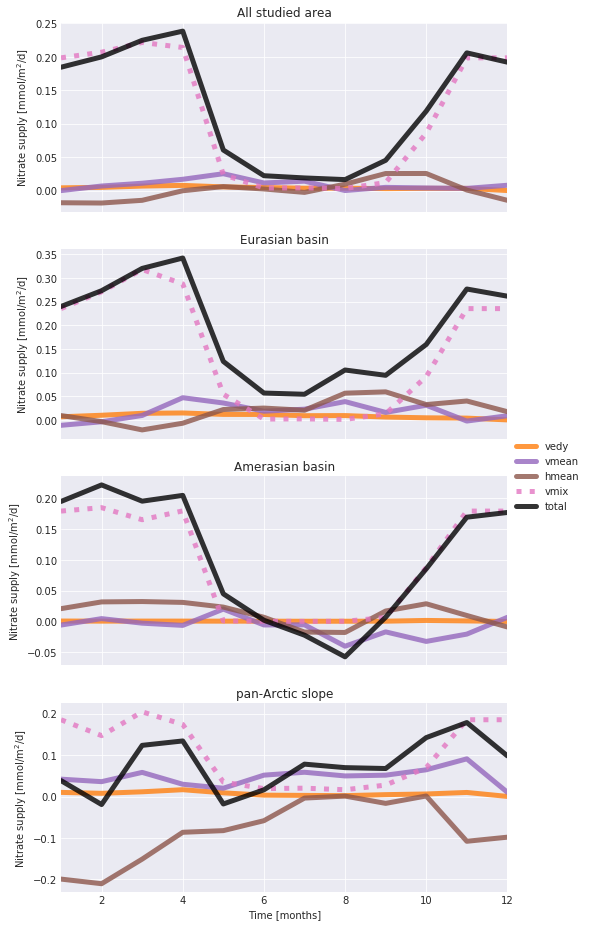

In [13]:
figsize = (8, 16)
rows,cols = 4,1
fig = plt.figure(figsize=figsize, constrained_layout=False)
axs = fig.subplots(rows,cols,sharey=False,sharex=True)

plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-talk')

months = np.arange(1,13)

balance = hedyv2_all+vedyv2_all+hadv2_all+vadv2_all+vmix_all
# axs[0].plot(months,hedy_all, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[0].plot(months,vedy_all, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[0].plot(months,hadv_all, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[0].plot(months,vadv_all, lw=5, label='vmeso',color=colors(3), alpha=0.8)
#axs[0].plot(months,hedyv2_all, lw=5, label='hedy',color=colors(0), alpha=0.8)
axs[0].plot(months,vedyv2_all, lw=5, label='vedy',color=colors(1), alpha=0.8)
axs[0].plot(months,vadv2_all, lw=5, label='vmean',color=colors(4), alpha=0.8)
axs[0].plot(months,hadv2_all, lw=5, label='hmean',color=colors(5), alpha=0.8)
axs[0].plot(months,vmix_all, ':', lw=5, label='vmix',color=colors(6), alpha=0.8)
axs[0].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[0].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[0].set_xlim(1,12)
#axs[0].set_ylim(-0.3,0.8)
axs[0].set_title('All studied area')

balance = hedyv2_eu+vedyv2_eu+hadv2_eu+vadv2_eu+vmix_eu
# axs[1].plot(months,hedy_eu, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[1].plot(months,vedy_eu, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[1].plot(months,hadv_eu, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[1].plot(months,vadv_eu, lw=5, label='vmeso',color=colors(3), alpha=0.8)
#axs[1].plot(months,hedyv2_eu, lw=5, label='hedy',color=colors(0), alpha=0.8)
axs[1].plot(months,vedyv2_eu, lw=5, label='vedy',color=colors(1), alpha=0.8)
axs[1].plot(months,vadv2_eu, lw=5, label='vmean',color=colors(4), alpha=0.8)
axs[1].plot(months,hadv2_eu, lw=5, label='hmean',color=colors(5), alpha=0.8)
axs[1].plot(months,vmix_eu, ':', lw=5, label='vmix',color=colors(6), alpha=0.8)
axs[1].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[1].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[1].set_xlim(1,12)
#axs[1].set_ylim(-0.3,0.8)
axs[1].set_title('Eurasian basin')

balance = hedyv2_am+vedyv2_am+hadv2_am+vadv2_am+vmix_am
# axs[2].plot(months,hedy_am, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[2].plot(months,vedy_am, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[2].plot(months,hadv_am, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[2].plot(months,vadv_am, lw=5, label='vmeso',color=colors(3), alpha=0.8)
#axs[2].plot(months,hedyv2_am, lw=5, label='hedy',color=colors(0), alpha=0.8)
axs[2].plot(months,vedyv2_am, lw=5, label='vedy',color=colors(1), alpha=0.8)
axs[2].plot(months,vadv2_am, lw=5, label='vmean',color=colors(4), alpha=0.8)
axs[2].plot(months,hadv2_am, lw=5, label='hmean',color=colors(5), alpha=0.8)
axs[2].plot(months,vmix_am, ':', lw=5, label='vmix',color=colors(6), alpha=0.8)
axs[2].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[2].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[2].set_xlim(1,12)
#axs[2].set_ylim(-0.3,0.8)
axs[2].set_title('Amerasian basin')

balance = hedyv2_sl+vedyv2_sl+hadv2_sl+vadv2_sl+vmix_sl
# axs[3].plot(months,hedy_sl, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[3].plot(months,vedy_sl, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[3].plot(months,hadv_sl, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[3].plot(months,vadv_sl, lw=5, label='vmeso',color=colors(3), alpha=0.8)
#axs[3].plot(months,hedyv2_sl, lw=5, label='hedy',color=colors(0), alpha=0.8)
axs[3].plot(months,vedyv2_sl, lw=5, label='vedy',color=colors(1), alpha=0.8)
axs[3].plot(months,vadv2_sl, lw=5, label='vmean',color=colors(4), alpha=0.8)
axs[3].plot(months,hadv2_sl, lw=5, label='hmean',color=colors(5), alpha=0.8)
axs[3].plot(months,vmix_sl, ':', lw=5,label='vmix',color=colors(6), alpha=0.8)
axs[3].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[3].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[3].set_xlim(1,12)
#axs[3].set_ylim(-0.3,0.8)
axs[3].set_xlabel('Time [months]')
axs[3].set_title('pan-Arctic slope')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 1))